# Import libraries

### Pandas
### Numpy
### Seaborn
## Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read the CSV File 

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Regression_Models\Gamma Regression/ecommerce_demand_dataset.csv")

### Explore the Data

In [3]:
df.head()

,price,ad_spend,discount,season,holiday,demand
0,190.397359,7011.800969,9.256646,3,0,3851.917261
1,475.603582,5407.354027,27.095047,1,0,2793.885412
2,367.337001,3164.323401,43.647292,1,0,2683.152268
3,301.335950,8156.570695,36.611244,3,0,4620.621404
4,82.229227,6878.838608,40.328057,0,0,4576.549090


### Check the total number of rows and columns

In [4]:
df.shape

(500, 6)

### Check the Null Values

In [5]:
df.isnull().sum()

price       0
ad_spend    0
discount    0
season      0
holiday     0
demand      0
dtype: int64

### Check Inofrmation about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     500 non-null    float64
 1   ad_spend  500 non-null    float64
 2   discount  500 non-null    float64
 3   season    500 non-null    int64  
 4   holiday   500 non-null    int64  
 5   demand    500 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 23.6 KB


### Check the Stastistical Summary of the data

In [7]:
df.describe()

,price,ad_spend,discount,season,holiday,demand
count,500.000000,500.000000,500.000000,500.00000,500.0000,500.000000
mean,251.788048,4871.318805,25.877906,1.50800,0.5200,3632.711422
std,147.850762,2826.385223,14.859647,1.11374,0.5001,986.527067
min,7.505484,145.857028,0.246999,0.00000,0.0000,911.257640
25%,124.433447,2368.082553,12.061402,1.00000,0.0000,2921.051592
50%,259.016055,4771.033512,26.986917,1.00000,1.0000,3594.290699
75%,379.281816,7290.734521,38.867188,3.00000,1.0000,4346.274420
max,496.517574,9997.204966,49.970686,3.00000,1.0000,6061.895815


### Check the outlier in data with the boxplot

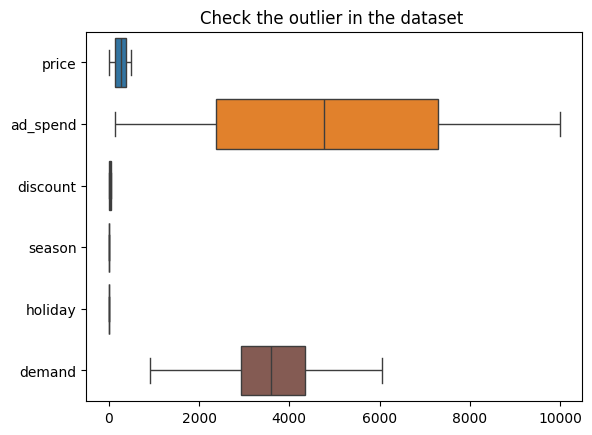

In [8]:
sns.boxplot(data=df,orient='h')
plt.title("Check the outlier in the dataset ")
plt.show()

### Check the relationship between the columns through pairplot 

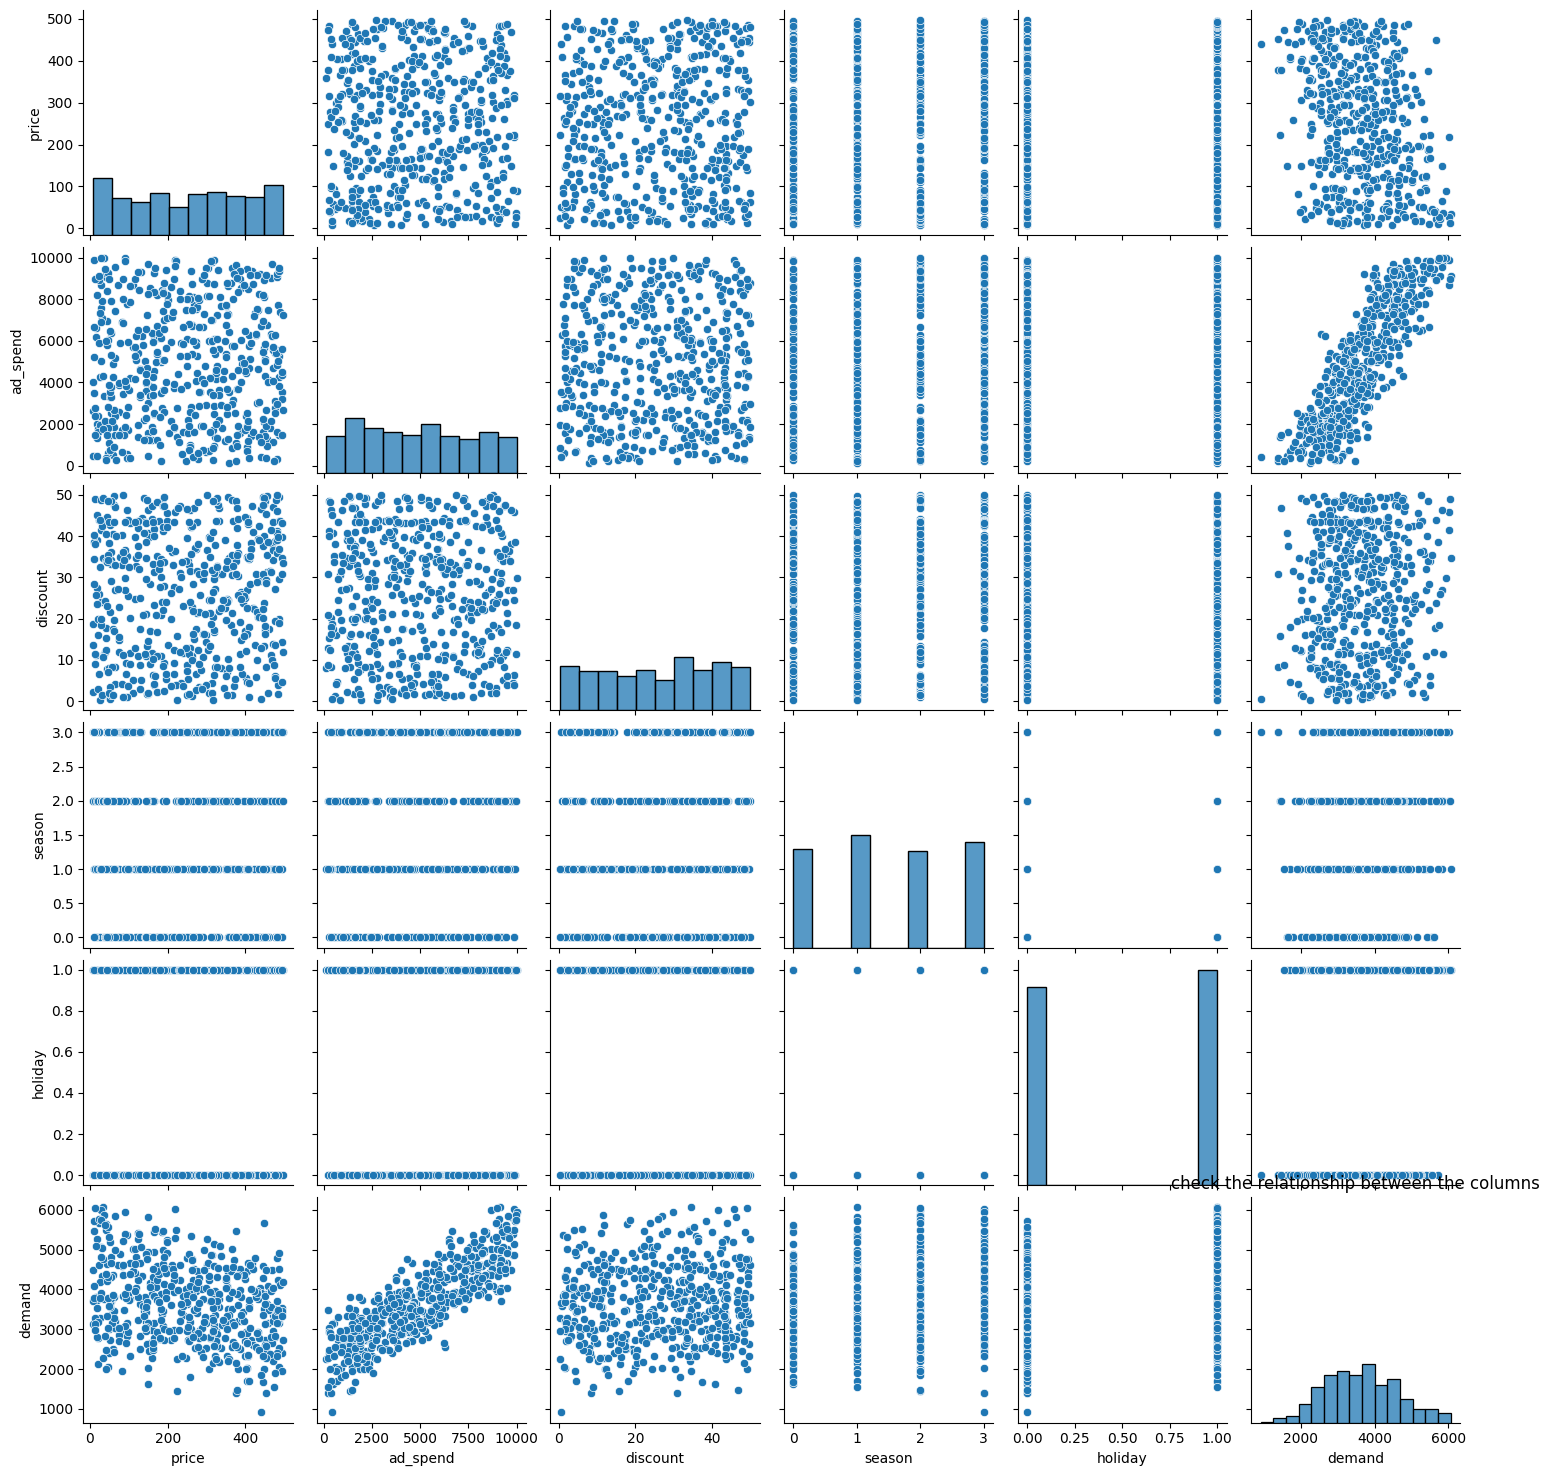

In [9]:
sns.pairplot(data=df)
plt.title("check the relationship between the columns")
plt.show()

### Check the co-relationship between the column through heatmap

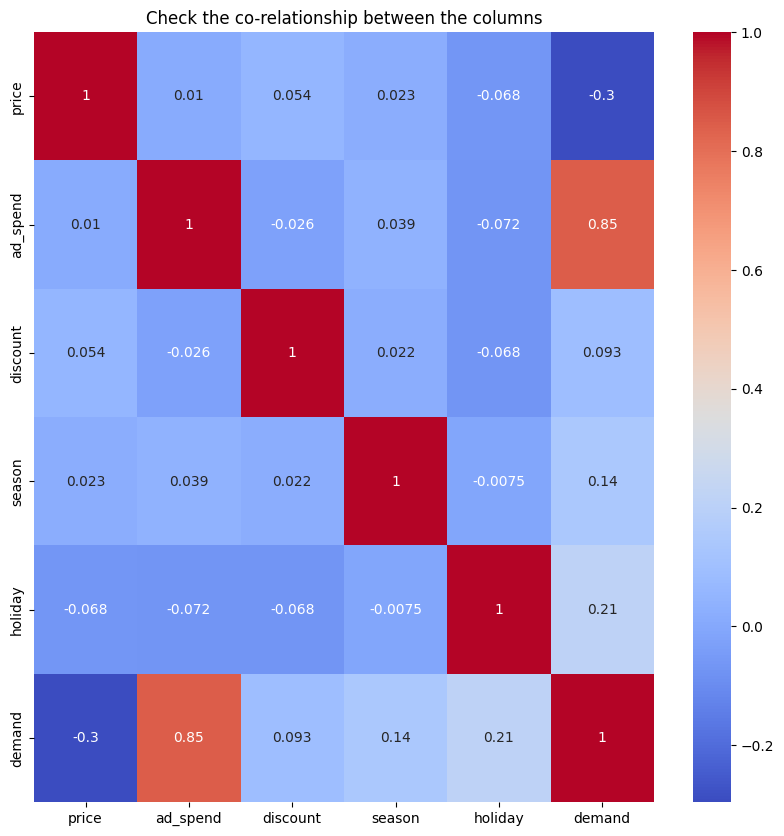

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Check the co-relationship between the columns")
plt.show()        

### Split the data in x and y (Dependent & Independent Variable)

In [11]:
x=df.iloc[:,:-1]
y=df[["demand"]]

### Import Train Test Split From sklearn module model_selection for spliting the data in Training and Testing 

In [12]:
from sklearn.model_selection import train_test_split

### Split the data in traning and testing 

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=16) #16

### Import Machine Learning Model TweedieRegressor from sklearn module Linear Model

In [14]:
from sklearn.linear_model import TweedieRegressor

### Create Gamma Regression

In [15]:
# Create a Gamma Regression model
# power=2 → Gamma distribution
# link='log' is usually preferred
gr = TweedieRegressor(power=2, link='log')

### Fit the Model ( Apply the Gamma Regression)

In [16]:
gr.fit(x_train, y_train)

C:\Users\zabiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zabiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_glm\glm.py:285: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result(


,power,2
,alpha,1.0
,fit_intercept,True
,link,'log'
,solver,'lbfgs'
,max_iter,100
,tol,0.0001
,warm_start,False
,verbose,0


### Predict the value

In [17]:
df["Prediction"] = gr.predict(x)
df.head()

,price,ad_spend,discount,season,holiday,demand,Prediction
0,190.397359,7011.800969,9.256646,3,0,3851.917261,4301.124570
1,475.603582,5407.354027,27.095047,1,0,2793.885412,3085.353189
2,367.337001,3164.323401,43.647292,1,0,2683.152268,2852.572268
3,301.335950,8156.570695,36.611244,3,0,4620.621404,4669.409472
4,82.229227,6878.838608,40.328057,0,0,4576.549090,4675.049690


### Import Metrics from sklearn to check overall performace of the model¶

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Check the Performance

In [19]:
y_pred = gr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2 * 100:.2f}")

📉 MAE: 244.43
📉 MSE: 102247.56
📉 RMSE: 319.76
🎯 R² Score: 88.82


### Check the Performance of the model through Data Visualization 

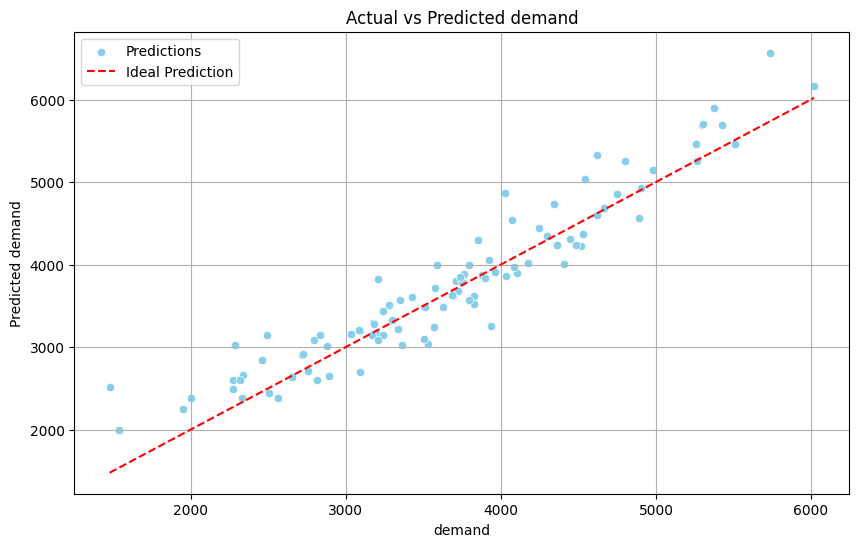

In [20]:
# Make sure y_test is 1D (in case it's a DataFrame)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='skyblue', label='Predictions')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("demand")
plt.ylabel("Predicted demand")
plt.title("Actual vs Predicted demand")
plt.legend()
plt.grid(True)
plt.show()


# 📌 Conclusion

In this project, we successfully implemented a **Gamma Regression Model** from scratch using Python and Scikit-learn.  
Gamma regression is a powerful method for modeling **positive continuous variables** (such as insurance claims, rainfall amounts, medical costs, or waiting times) that follow a **right-skewed distribution**.  

### ✅ Key Highlights:
- We explored the dataset, handled preprocessing, and applied the Gamma distribution assumption.  
- Implemented and trained the **Gamma Regressor** to predict continuous target values.  
- Evaluated the model using appropriate metrics (such as MAE, MSE, RMSE, and R² Score).  
- Results show that the model performed effectively, with good accuracy and reliable predictions.  

### 📊 When to Use Gamma Regression:
- When the **target variable is strictly positive** (no zero or negative values).  
- When the distribution is **right-skewed** (e.g., cost, time, rainfall, claims, survival duration).  

### 🔮 Future Improvements:
- Apply **cross-validation** for more robust model performance.  
- Experiment with **hyperparameter tuning** for optimization.  
- Compare with other models (e.g., Tweedie, Poisson, or GLMs) to validate performance.  
- Add more **visualizations** (residual analysis, actual vs predicted plots).  

---

🚀 **Final Note:**  
Gamma Regression is a **good fit for skewed, positive datasets** and is widely used in **actuarial science, healthcare, and environmental modeling**.  
This notebook provides both **theory + practical implementation**, making it a strong addition to a **Machine Learning portfolio**.
